# Loan Data from Prosper Exploration
## by Mohamed Mamdouh Aly

## Preliminary Wrangling

> This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [2]:
df = pd.read_csv("/home/mmamdouh/Desktop/udacity/project3/communicate-data-project-template/Project Template/prosperLoanData.csv")

In [3]:
df.shape

(113937, 81)

In [4]:
df.isna().sum()

ListingKey                                  0
ListingNumber                               0
ListingCreationDate                         0
CreditGrade                             84984
Term                                        0
LoanStatus                                  0
ClosedDate                              58848
BorrowerAPR                                25
BorrowerRate                                0
LenderYield                                 0
EstimatedEffectiveYield                 29084
EstimatedLoss                           29084
EstimatedReturn                         29084
ProsperRating (numeric)                 29084
ProsperRating (Alpha)                   29084
ProsperScore                            29084
ListingCategory (numeric)                   0
BorrowerState                            5515
Occupation                               3588
EmploymentStatus                         2255
EmploymentStatusDuration                 7625
IsBorrowerHomeowner               

> Check the columns with missing values

In [5]:
df = df.dropna(axis=1)
df.shape

(113937, 38)

> Drop columns with missing values

In [6]:
df.isna().sum()

ListingKey                         0
ListingNumber                      0
ListingCreationDate                0
Term                               0
LoanStatus                         0
BorrowerRate                       0
LenderYield                        0
ListingCategory (numeric)          0
IsBorrowerHomeowner                0
CurrentlyInGroup                   0
DateCreditPulled                   0
OpenRevolvingAccounts              0
OpenRevolvingMonthlyPayment        0
IncomeRange                        0
IncomeVerifiable                   0
StatedMonthlyIncome                0
LoanKey                            0
LoanCurrentDaysDelinquent          0
LoanMonthsSinceOrigination         0
LoanNumber                         0
LoanOriginalAmount                 0
LoanOriginationDate                0
LoanOriginationQuarter             0
MemberKey                          0
MonthlyLoanPayment                 0
LP_CustomerPayments                0
LP_CustomerPrincipalPayments       0
L

> Check the columns with no missing values

In [7]:
df.head()

,ListingKey,ListingNumber,ListingCreationDate,Term,LoanStatus,BorrowerRate,LenderYield,ListingCategory (numeric),IsBorrowerHomeowner,CurrentlyInGroup,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,36,Completed,0.1580,0.1380,0,True,True,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,36,Current,0.0920,0.0820,2,False,False,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,36,Completed,0.2750,0.2400,0,False,True,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,36,Current,0.0974,0.0874,16,True,False,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,36,Current,0.2085,0.1985,2,True,False,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


> Check the data with the current columns

### What is the structure of your dataset?

> The data contains 113937 rows and 81 columns

### What is/are the main feature(s) of interest in your dataset?

> LoanStatus, BorrowerRate, ListingCategory (numeric), IsBorrowerHomeowner, Investors, IncomeRange, IncomeVerifiable, StatedMonthlyIncome, LoanOriginalAmount,LoanOriginationDate, MonthlyLoanPayment, Recommendations, InvestmentFromFriendsCount, InvestmentFromFriendsAmount.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> BorrowerRate, ListingCategory (numeric), IsBorrowerHomeowner, IncomeRange, IncomeVerifiable, StatedMonthlyIncome, LoanOriginalAmount,LoanOriginationDate, MonthlyLoanPayment, Recommendations.

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

In [8]:
df.head()

,ListingKey,ListingNumber,ListingCreationDate,Term,LoanStatus,BorrowerRate,LenderYield,ListingCategory (numeric),IsBorrowerHomeowner,CurrentlyInGroup,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,36,Completed,0.1580,0.1380,0,True,True,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,36,Current,0.0920,0.0820,2,False,False,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,36,Completed,0.2750,0.2400,0,False,True,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,36,Current,0.0974,0.0874,16,True,False,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,36,Current,0.2085,0.1985,2,True,False,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


### Listing Category

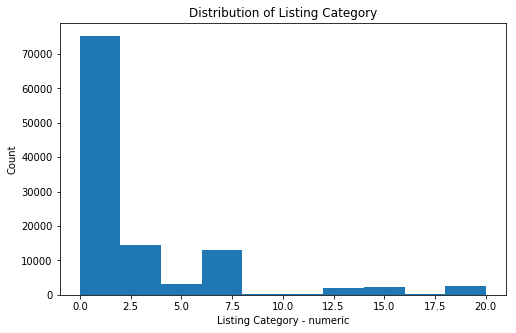

In [9]:
plt.figure(figsize=(8, 5))
plt.hist(data = df, x = 'ListingCategory (numeric)')
plt.ylabel('Count');
plt.xlabel('Listing Category - numeric');
plt.title("Distribution of Listing Category");

> From the previous histogram we can show that the most common Listing Category arount 0, 1, 2, 3, 7

In [10]:
df['ListingCategory'] = df["ListingCategory (numeric)"].map({
     0: "Not Available",
     1: "Debt Consolidation",
     2: "Home Improvement",
     3: "Business",
     4: "Personal Loan",
     5: "Student Use",
     6: "Auto",
     7: "Other",
     8: "Baby&Adoption",
     9: "Boat",
     10: "Cosmetic Procedure",
     11: "Engagement Ring",
     12: "Green Loans",
     13: "Household Expenses",
     14: "Large Purchases",
     15: "Medical/Dental",
     16: "Motorcycle",
     17: "RV",
     18: "Taxes",
     19: "Vacation",
     20: "Wedding Loans"})

> Changing the ListingCategory (numeric) to ListingCategory to be visable

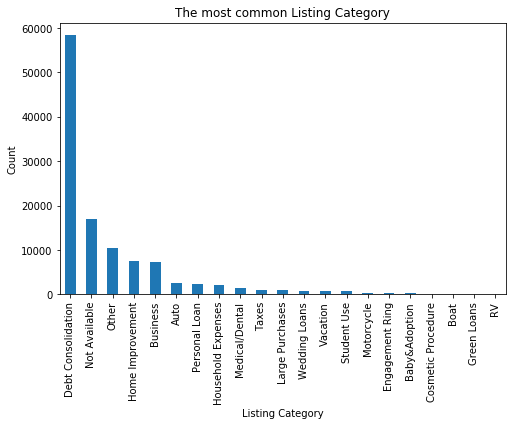

In [11]:
plt.figure(figsize=(8, 5))
df['ListingCategory'].value_counts().plot(kind='bar');
plt.ylabel('Count');
plt.xlabel('Listing Category');
plt.title("The most common Listing Category");

> As we see the most poplar loan type is that Debt Consolidation loan

### Income Range

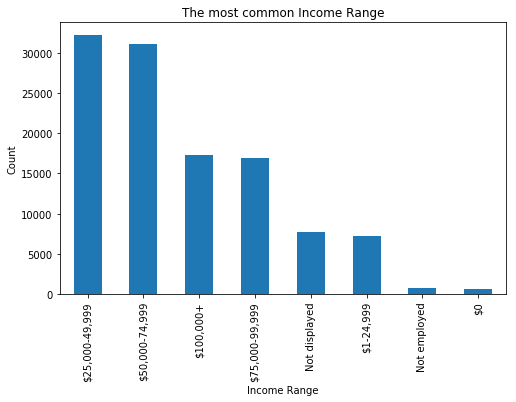

In [12]:
plt.figure(figsize=(8, 5))
df['IncomeRange'].value_counts().plot(kind='bar');
plt.ylabel('Count');
plt.xlabel('Income Range');
plt.title("The most common Income Range");

> As we see the most common income range betwwen 25000 to 75000 $ 

### Investors

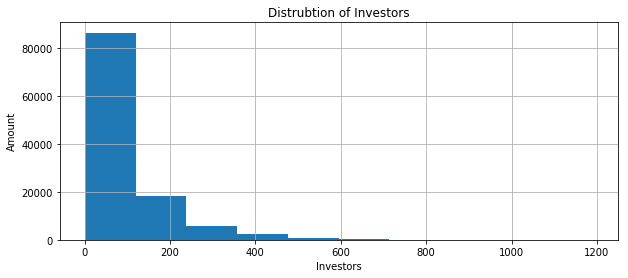

In [13]:
plt.figure(figsize=(10, 4))
df.Investors.hist();
plt.ylabel('Amount');
plt.xlabel('Investors');
plt.title("Distrubtion of Investors");

### Income Verifiable

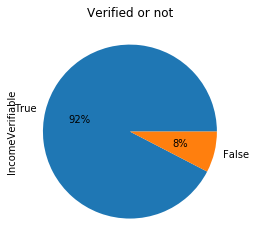

In [14]:
plt.figure(figsize=(10, 4))
df.IncomeVerifiable.value_counts().plot(kind='pie', autopct='%1.0f%%');
plt.title("Verified or not");

> The precentage of people with The verified income vs people are not.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> ListingCategory (numeric): As we see from the histogram and barchart we notice that the most common category is Debt Consolidation. We also did a transformation to convert numbers to the name of each category number.

> IncomeRange: We did not any transformation on the data, and it's simply clarify the income range.

> Investors: we can show the inverstors distribution from the histogram, and we did not do any transformation.

> IncomeVerifiable: To show the precentage of verified income vs the not ones.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> I did a tranformation on ListingCategory (numeric) to can know well whta the category intead of numbers

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

### Listing Category with SUM of Investors

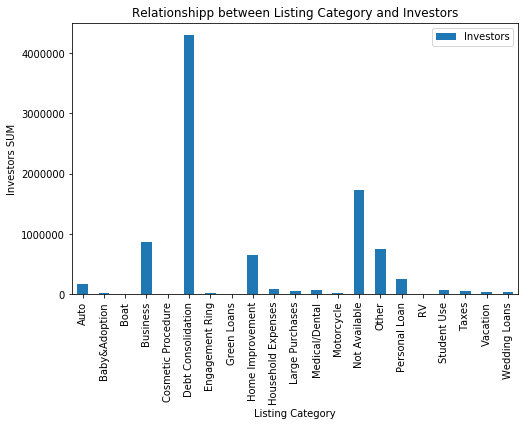

In [15]:
df.groupby('ListingCategory').agg({'Investors': 'sum'}).plot(figsize=(8, 5), kind='bar', title="Relationshipp between Listing Category and Investors");
plt.xlabel("Listing Category");
plt.ylabel("Investors SUM");

> We can see that the number of investors that funded the debt loans are too high.

### Listing Category with Count of each category in IncomeRange

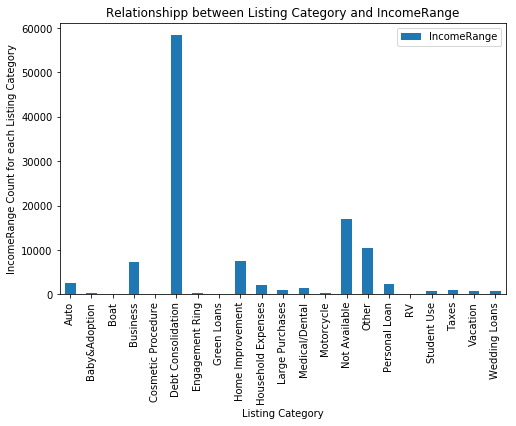

In [16]:
df.groupby('ListingCategory').agg({'IncomeRange': 'count'}).plot(figsize=(8, 5), kind='bar', title="Relationshipp between Listing Category and IncomeRange");
plt.xlabel("Listing Category");
plt.ylabel("IncomeRange Count for each Listing Category");

> And also we can see that the number of income range coverd the dept loans are too high.

### ListingCategory for every single IncomeRange

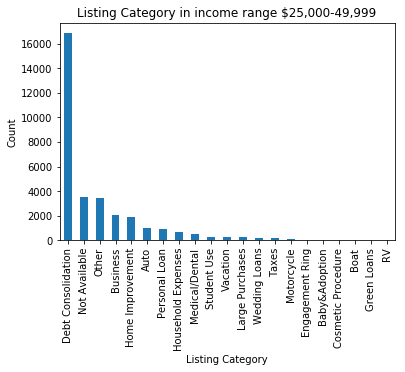

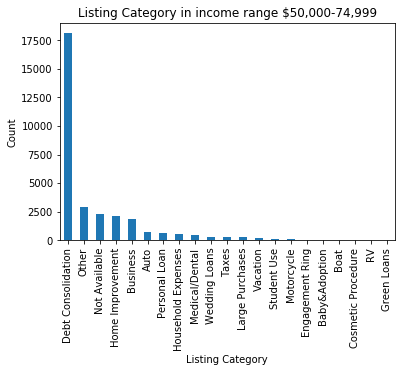

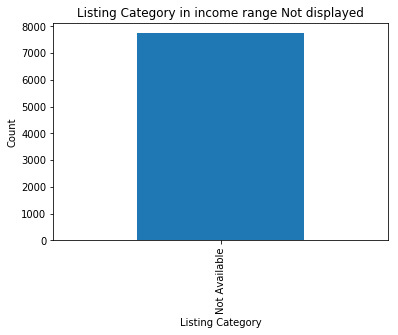

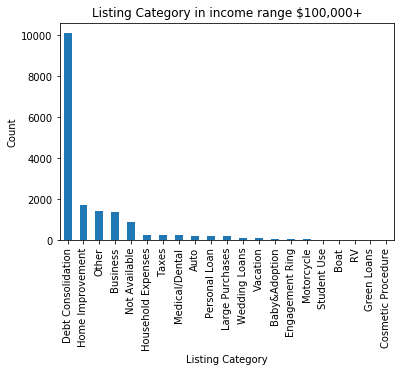

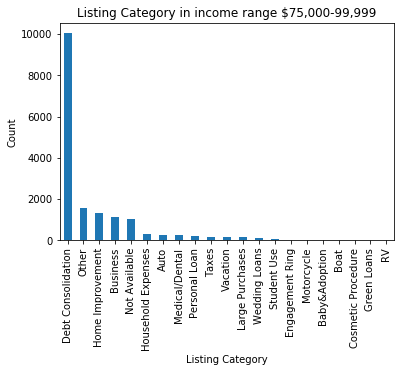

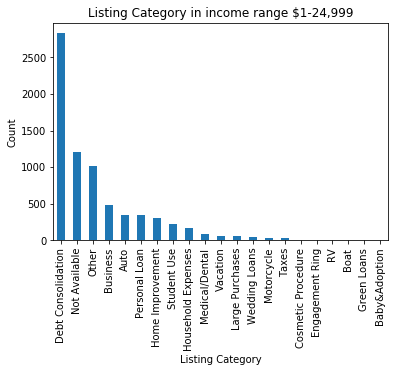

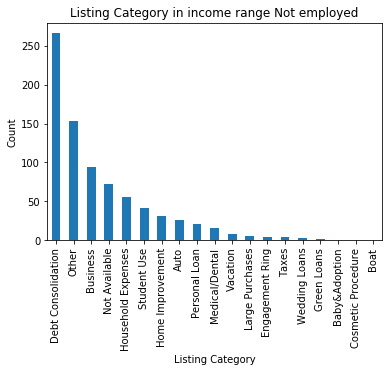

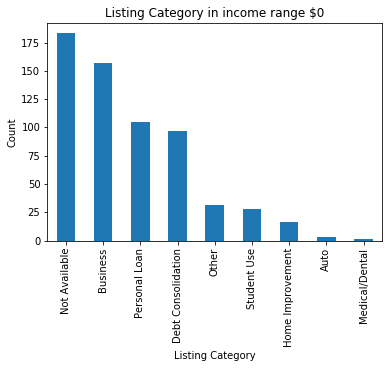

In [17]:
income_list = list(df['IncomeRange'].unique())
for income in income_list:
    df.query("IncomeRange == @income")['ListingCategory'].value_counts().plot(kind='bar');
    plt.title("Listing Category in income range "+income);
    plt.xlabel("Listing Category");
    plt.ylabel("Count");
    plt.show()

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> I think the choosen featuers are related speacially the Income range and loan type.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> We can see that the most popular loan type among the all income ranges in debt loans, that ensure that this loan in important amount the all income range and no loan preferred in specific income range.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Relation between IncomeRange, LoanOriginalAmount, and IncomeVerifiable

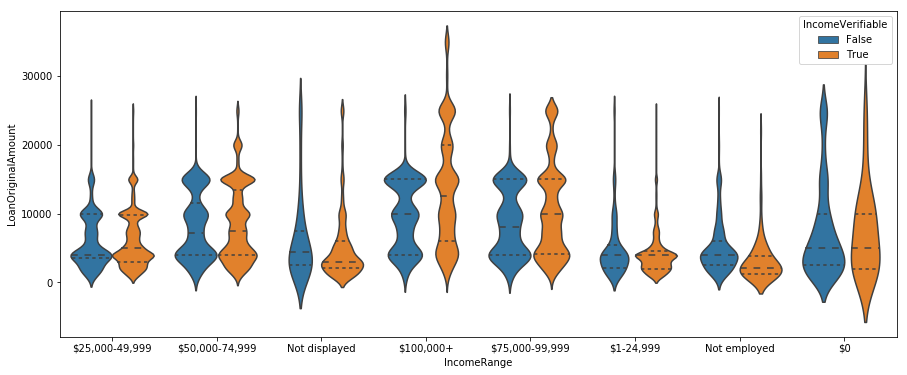

In [18]:
plt.figure(figsize=(15, 6))
sns.violinplot(data=df, x="IncomeRange", y="LoanOriginalAmount", hue="IncomeVerifiable", inner="quart");

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> As the previous graph shown we are trying to go deep into the graph to understand better the relationship between Income Range, Loan Original Amount, and Income Verifiable to see the impact of each feature on each other.


### Were there any interesting or surprising interactions between features?

> It's not expected to me to find like no major impact because of Income Verifiable, so we can see that the verification of the income is not impact the amount of the loan strongly,  the only thing we an notice that the amount of loan is get higher with the people get income in range +100000 dollar and noticed strongly in the verified income people in this case, we can see also the the people with income range not employed, and less than or equal 50000 dollar takes loans less than 10000 dollar.

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!